In [25]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('healthcare_heart_disease.csv')
df

,Age,Cholesterol,Blood_Pressure,Smoker,Diabetic,Exercise,Heart_Disease
0,63,225,95,0,0,0,0
1,76,187,162,1,0,1,1
2,53,290,173,0,1,0,1
3,39,236,127,1,0,0,1
4,67,207,115,0,0,1,0
...,...,...,...,...,...,...,...
4995,27,227,175,0,0,0,1
4996,75,296,170,1,0,0,1
4997,46,256,175,1,0,0,1
4998,71,275,151,1,0,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             5000 non-null   int64
 1   Cholesterol     5000 non-null   int64
 2   Blood_Pressure  5000 non-null   int64
 3   Smoker          5000 non-null   int64
 4   Diabetic        5000 non-null   int64
 5   Exercise        5000 non-null   int64
 6   Heart_Disease   5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [44]:
df.describe()

,Age,Cholesterol,Blood_Pressure,Smoker,Diabetic,Exercise,Heart_Disease
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,52.222800,225.258800,135.196000,0.303000,0.20000,0.413800,0.767000
std,15.799224,42.931774,26.052588,0.459601,0.40004,0.492563,0.422785
min,25.000000,150.000000,90.000000,0.000000,0.00000,0.000000,0.000000
25%,39.000000,188.000000,113.000000,0.000000,0.00000,0.000000,1.000000
50%,52.000000,226.000000,136.000000,0.000000,0.00000,0.000000,1.000000
75%,66.000000,262.000000,158.000000,1.000000,0.00000,1.000000,1.000000
max,79.000000,299.000000,179.000000,1.000000,1.00000,1.000000,1.000000


In [45]:
df.isnull().sum()

,0
Age,0
Cholesterol,0
Blood_Pressure,0
Smoker,0
Diabetic,0
Exercise,0
Heart_Disease,0


In [46]:
df['Heart_Disease'].value_counts()

,count
Heart_Disease,
1,3835
0,1165


In [47]:
X = df.iloc[:,:-1]
y = df['Heart_Disease']

print(X)
print(y)

      Age  Cholesterol  Blood_Pressure  Smoker  Diabetic  Exercise
0      63          225              95       0         0         0
1      76          187             162       1         0         1
2      53          290             173       0         1         0
3      39          236             127       1         0         0
4      67          207             115       0         0         1
...   ...          ...             ...     ...       ...       ...
4995   27          227             175       0         0         0
4996   75          296             170       1         0         0
4997   46          256             175       1         0         0
4998   71          275             151       1         0         0
4999   28          164              97       1         0         1

[5000 rows x 6 columns]
0       0
1       1
2       1
3       1
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: Heart_Disease, Length: 5000, dtype: int64


In [48]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)

(7670, 6)
(7670,)


In [49]:
y_resampled.value_counts()

,count
Heart_Disease,
0,3835
1,3835


In [50]:
corr_matrix = df.corr()
corr_matrix

,Age,Cholesterol,Blood_Pressure,Smoker,Diabetic,Exercise,Heart_Disease
Age,1.000000,0.025310,-0.009096,-0.009078,0.003425,0.016375,0.010498
Cholesterol,0.025310,1.000000,-0.005721,-0.002302,-0.003003,-0.015821,0.380812
Blood_Pressure,-0.009096,-0.005721,1.000000,0.020049,0.010883,0.011325,0.426452
Smoker,-0.009078,-0.002302,0.020049,1.000000,0.011968,-0.021125,0.363400
Diabetic,0.003425,-0.003003,0.010883,0.011968,1.000000,-0.008934,0.015376
Exercise,0.016375,-0.015821,0.011325,-0.021125,-0.008934,1.000000,-0.011453
Heart_Disease,0.010498,0.380812,0.426452,0.363400,0.015376,-0.011453,1.000000


<Axes: >

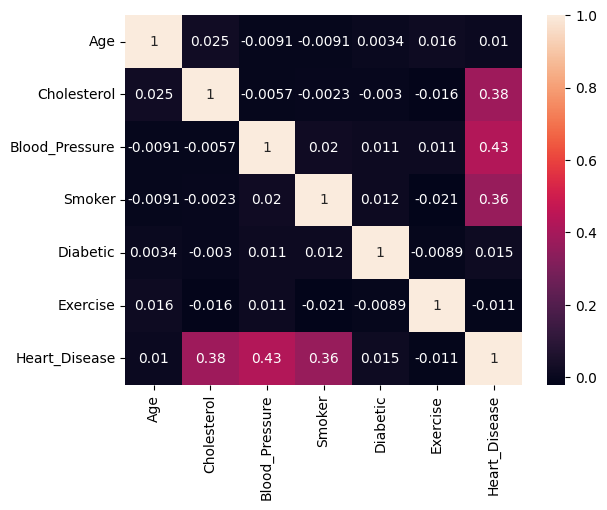

In [51]:
sns.heatmap(corr_matrix, annot=True)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [53]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print('Accuracy: ', accuracy_score(y_test, lr_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, lr_pred))
print('Classification Report',classification_report(y_test, lr_pred))

Accuracy:  0.9015645371577575
Confusion Matrix:  [[685  70]
 [ 81 698]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.91      0.90       755
           1       0.91      0.90      0.90       779

    accuracy                           0.90      1534
   macro avg       0.90      0.90      0.90      1534
weighted avg       0.90      0.90      0.90      1534



In [55]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [56]:
print('Accuracy: ', accuracy_score(y_test, dt_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, dt_pred))
print('Classification Report',classification_report(y_test, dt_pred))

Accuracy:  1.0
Confusion Matrix:  [[755   0]
 [  0 779]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1534
   macro avg       1.00      1.00      1.00      1534
weighted avg       1.00      1.00      1.00      1534



In [57]:
rt_model = RandomForestClassifier()
rt_model.fit(X_train, y_train)
rt_pred = rt_model.predict(X_test)

In [41]:
print('Accuracy: ', accuracy_score(y_test, rt_pred))
print('Confusion Matrix: ',confusion_matrix(y_test, rt_pred))
print('Classification Report',classification_report(y_test, rt_pred))

Accuracy:  0.9953379953379954
Confusion Matrix:  [[857   0]
 [  8 851]]
Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      1.00       857
           1       1.00      0.99      1.00       859

    accuracy                           1.00      1716
   macro avg       1.00      1.00      1.00      1716
weighted avg       1.00      1.00      1.00      1716

